In [1]:
# canonical import
import pandas as pd

# importing data and dropping na

In [2]:
reddit_df = pd.read_csv('../raw_data/reddit_wsb.csv')
reddit_df = reddit_df.dropna()

In [3]:
def include_ticker(string):
    ticker_list = ['GME', 'TSLA']
    for ticker in ticker_list:
        if ticker in string:
            return ticker

In [4]:
string = "loren ipsum GME ipsum TSLA"

import re

print(re.findall("[A-Z]{3,6}", string))

['GME', 'TSLA']


In [5]:
def get_ticker(string):
    return re.findall("[A-Z]{3,6}", string)

In [6]:
reddit_df['new_ticker'] = reddit_df['body'].map(lambda x: get_ticker(x))

In [7]:
reddit_df

,title,score,id,url,comms_num,created,body,timestamp,new_ticker
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,"[CEO, NASDAQ, SEC, GME]"
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,"[GME, ITM, DON, PANIC, THE, SQUEEZ, DOESN, HAP..."
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31,"[THEM, AND, THEY, ARE, SCARED, GME]"
10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,"[GME, AMC]"
12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10,"[GME, GME, JPM, GME, SLV, GME, FAIR, OWN, SHOR..."
...,...,...,...,...,...,...,...,...,...
50689,Weird S&P 500 Correlation to Euro Cup & World Cup,0,o4qwae,https://www.reddit.com/r/wallstreetbets/commen...,14,1.624295e+09,Following is the data and the corresponding S&...,2021-06-21 19:56:54,[EURO]
50690,I $ZIM to the moon,0,o4qu51,https://www.reddit.com/r/wallstreetbets/commen...,10,1.624294e+09,ZIM Integrated Shipping Services should be at ...,2021-06-21 19:52:28,"[ZIM, ZIM, IPO, WISH, ZIM, ZIM, ZIM]"
50693,Atypical DD for WSB: ATSG for a smooth ascent,29,o4mcu4,https://www.reddit.com/r/wallstreetbets/commen...,28,1.624276e+09,**TLDR: ATSG is a fantastic value at its curre...,2021-06-21 14:48:18,"[TLDR, ATSG, NOT, EXPECT, BAGGER, ATSG, COVID,..."
50694,SENS DD,166,o4m5ju,https://www.reddit.com/r/wallstreetbets/commen...,63,1.624275e+09,SENS why to buy\n Skip to end to see summary \...,2021-06-21 14:36:26,"[SENS, SENS, CGM, FDA, SENS, CGM, CGM, CGM, CG..."


In [28]:
!pip install matplot

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     |████████████████████████████████| 60 kB 2.4 MB/s eta 0:00:01
  Using cached matplotlib-3.4.2-cp38-cp38-macosx_10_9_x86_64.whl (7.2 MB)
  Using cached Pillow-8.3.1-cp38-cp38-macosx_10_10_x86_64.whl (2.9 MB)
  Using cached kiwisolver-1.3.1-cp38-cp38-macosx_10_9_x86_64.whl (61 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 78 kB 6.4 MB/s eta 0:00:01
  Created wheel for SimpleWebSocketServer: filename=SimpleWebSocketServer-0.1.1-py3-none-any.whl size=9492 sha256=f02fe392f6905dddd298f53272be412771efa5566113dd014fc2e7b23a8fba2a
  Stored in directory: /Users/netoconcon/Library/Caches/pip/wheels/02/28/f3/c9739708d8

<AxesSubplot:xlabel='0'>

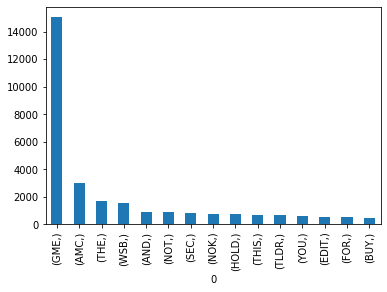

In [29]:
sublist = reddit_df['new_ticker'].to_list()
import matplotlib.pyplot as plt

# [item for sublist in t for item in sublist]
import itertools
tickers = list(itertools.chain(*sublist))
pd.DataFrame(tickers).value_counts().head(15).plot(kind="bar")

# Marking the DF

### getting the stock

In [9]:
reddit_df['stock_body'] = reddit_df['body'].map(lambda x: include_ticker(x))
reddit_df['stock_title'] = reddit_df['title'].map(lambda x: include_ticker(x))

reddit_df

,title,score,id,url,comms_num,created,body,timestamp,new_ticker,stock_body,stock_title
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,"[CEO, NASDAQ, SEC, GME]",GME,None
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,"[GME, ITM, DON, PANIC, THE, SQUEEZ, DOESN, HAP...",GME,None
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31,"[THEM, AND, THEY, ARE, SCARED, GME]",GME,None
10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,"[GME, AMC]",GME,None
12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10,"[GME, GME, JPM, GME, SLV, GME, FAIR, OWN, SHOR...",GME,GME
...,...,...,...,...,...,...,...,...,...,...,...
50689,Weird S&P 500 Correlation to Euro Cup & World Cup,0,o4qwae,https://www.reddit.com/r/wallstreetbets/commen...,14,1.624295e+09,Following is the data and the corresponding S&...,2021-06-21 19:56:54,[EURO],None,None
50690,I $ZIM to the moon,0,o4qu51,https://www.reddit.com/r/wallstreetbets/commen...,10,1.624294e+09,ZIM Integrated Shipping Services should be at ...,2021-06-21 19:52:28,"[ZIM, ZIM, IPO, WISH, ZIM, ZIM, ZIM]",None,None
50693,Atypical DD for WSB: ATSG for a smooth ascent,29,o4mcu4,https://www.reddit.com/r/wallstreetbets/commen...,28,1.624276e+09,**TLDR: ATSG is a fantastic value at its curre...,2021-06-21 14:48:18,"[TLDR, ATSG, NOT, EXPECT, BAGGER, ATSG, COVID,...",None,None
50694,SENS DD,166,o4m5ju,https://www.reddit.com/r/wallstreetbets/commen...,63,1.624275e+09,SENS why to buy\n Skip to end to see summary \...,2021-06-21 14:36:26,"[SENS, SENS, CGM, FDA, SENS, CGM, CGM, CGM, CG...",GME,None


In [10]:
def body_size(x):
    return len(x.split())

In [11]:
reddit_df['body_size'] = reddit_df['body'].map(lambda x: body_size(x))
reddit_df.reset_index()

,index,title,score,id,url,comms_num,created,body,timestamp,new_ticker,stock_body,stock_title,body_size
0,2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,"[CEO, NASDAQ, SEC, GME]",GME,None,226
1,6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,"[GME, ITM, DON, PANIC, THE, SQUEEZ, DOESN, HAP...",GME,None,116
2,7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31,"[THEM, AND, THEY, ARE, SCARED, GME]",GME,None,352
3,10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,"[GME, AMC]",GME,None,138
4,12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10,"[GME, GME, JPM, GME, SLV, GME, FAIR, OWN, SHOR...",GME,GME,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23591,50689,Weird S&P 500 Correlation to Euro Cup & World Cup,0,o4qwae,https://www.reddit.com/r/wallstreetbets/commen...,14,1.624295e+09,Following is the data and the corresponding S&...,2021-06-21 19:56:54,[EURO],None,None,222
23592,50690,I $ZIM to the moon,0,o4qu51,https://www.reddit.com/r/wallstreetbets/commen...,10,1.624294e+09,ZIM Integrated Shipping Services should be at ...,2021-06-21 19:52:28,"[ZIM, ZIM, IPO, WISH, ZIM, ZIM, ZIM]",None,None,173
23593,50693,Atypical DD for WSB: ATSG for a smooth ascent,29,o4mcu4,https://www.reddit.com/r/wallstreetbets/commen...,28,1.624276e+09,**TLDR: ATSG is a fantastic value at its curre...,2021-06-21 14:48:18,"[TLDR, ATSG, NOT, EXPECT, BAGGER, ATSG, COVID,...",None,None,904
23594,50694,SENS DD,166,o4m5ju,https://www.reddit.com/r/wallstreetbets/commen...,63,1.624275e+09,SENS why to buy\n Skip to end to see summary \...,2021-06-21 14:36:26,"[SENS, SENS, CGM, FDA, SENS, CGM, CGM, CGM, CG...",GME,None,957


### getting month

### get target data

In [12]:
reddit_df.drop(reddit_df[reddit_df['stock_body'] != "GME"].index, inplace=True)
reddit_df.shape

(6840, 12)

### getting sentimental

In [13]:
from tensorflow.keras import *
from transformers import pipeline

In [14]:
reddit_df.iloc[3]['body']

" I believe right now is one of those rare opportunities that we all can help and do good. Some of these companies like GME, AMC are good companies that's been hit hard by this pandemic. Hedgefunds and Wallstreet just want to short these companies to zero and make millions. \n\n I really think right now we have enough support and enough of us to change that direction in history. Wallstreet says  well weak companies need to just go. 10 yrs down the road though I want to be able to watch a movie in a movie theater with my family. If we all buy and hold in what we believe in it gives these companies a second chance and we as a group can stop these companies from being shorted to death and just disappear. Just my 2 cents!"

In [15]:
reddit_df.iloc[3]

title          We need to keep this movement going, we all ca...
score                                                        222
id                                                        l6uao1
url            https://www.reddit.com/r/wallstreetbets/commen...
comms_num                                                     70
created                                             1611861505.0
body            I believe right now is one of those rare oppo...
timestamp                                    2021-01-28 21:18:25
new_ticker                                            [GME, AMC]
stock_body                                                   GME
stock_title                                                 None
body_size                                                    138
Name: 10, dtype: object

In [16]:
classifier = pipeline('sentiment-analysis')

2021-07-13 22:00:01.288207: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [17]:
classifier(reddit_df.iloc[3]['body'])

[{'label': 'NEGATIVE', 'score': 0.8915445804595947}]

In [18]:
# def get_sentimental(x):
#     classifier = pipeline('sentiment-analysis')
#     text_chunk = " ".join(x.split()[0:427])
#     sentimental = classifier(text_chunk)[0]['label']
#     print(sentimental)
#     return sentimental

In [19]:
# reddit_df['title_sentimental'] = reddit_df['title'].map(lambda x: get_sentimental(x))
# reddit_df

In [20]:
# reddit to csv

In [21]:
# reddit_df['body_sentimental'] = reddit_df['body'].map(lambda x: get_sentimental(x))
# reddit_df

In [22]:
# reddit_df.drop(reddit_df[reddit_df['title_sentimental'] == "Nan"].index, inplace=True)

In [23]:
# classifier = pipeline('sentiment-analysis')

# classifier(reddit_df.iloc[23594]['body'])

In [24]:
# DO NOT DESTROY THIS CELLL

# " ".join(reddit_df.iloc[23594]['body'].split()[0:427])
# " ".join(reddit_df.iloc[23594]['body'].split()[427:-1])
# print(classifier(" ".join(reddit_df.iloc[23594]['body'].split()[0:427])))
# print(classifier(" ".join(reddit_df.iloc[23594]['body'].split()[-370:-1])))

# " ".join(reddit_df.iloc[23594]['body'].split()[-370:-1])
